# Area effettiva del Cosmic Ray Cube

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc
from IPython.display import SVG

## Comment these lines to deactivate LaTeX formatting
mpl.use('PS')
plt.rc('text', usetex=True)
plt.rc('font', family='Palatino')

## Inserire qui i parametri

NB: le figure sono state realizzate assumendo $\Delta z = L/3$, ma nelle formule questi due parametri sono indipendenti!

In [75]:
# Angolo di incidenza del muone (in gradi)
th_deg = 30
th = np.deg2rad(th_deg)
# Numero di piani di trigger
n_trig = 3
# Lato del cubo
L = 4
dz = L/3

print('Theta (deg):', th_deg)

Theta (deg): 30


## Caso #1: incidenza parallela alle facce laterali ($\phi = k\pi/2$)

In [96]:
if n_trig == 1:
    th_max = np.pi/2
else:
    th_max = np.arctan(L/((n_trig-1)*dz))

print('Theta max (deg):', np.rad2deg(th_max))
if th > th_max:
    print("L'angolo di incidenza è superiore al valore massimo per n_trig =", n_trig, "!")

Theta max (deg): 56.309932474020215


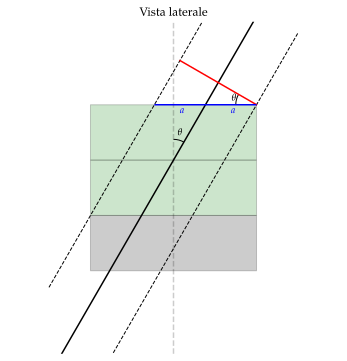

In [77]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
x = np.linspace(-3,3, 1000)
a = (1/2)*(L-((n_trig-1)*dz)*np.tan(th))
offset = L/2-(1/2)*(n_trig-1)*dz

for i in range(3):
    plane = Rectangle((-L/2,-L/2+i*dz), L, dz, edgecolor='k', facecolor='g' if i>=4-n_trig else 'k', alpha=.2)
    ax.add_patch(plane)

ax.axvline(0, ls='--', c='k', alpha=.2)
ax.plot(x, x*np.tan(np.pi/2-th)+offset, c='k')
ax.plot(x, (x-a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x, (x+a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x[(x<L/2) & (x>L/2-2*a*np.cos(th)**2)], (x[(x<L/2) & (x>L/2-2*a*np.cos(th)**2)]-L/2)*np.tan(-th)+L/2, color='r')
ax.hlines(L/2, xmin=L/2-2*a, xmax=L/2, color='b')
ax.add_patch(Arc((0,offset), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi/2-th), theta2=np.rad2deg(np.pi/2)))
ax.add_patch(Arc((L/2,L/2), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi-th), theta2=np.rad2deg(np.pi)))

ax.text(.1, offset+.6, r'$\theta$', usetex=True)
ax.text(L/2-a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/2-3*a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/2-.6,L/2+.1, r'$\theta$', usetex=True)
plt.title('Vista laterale')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

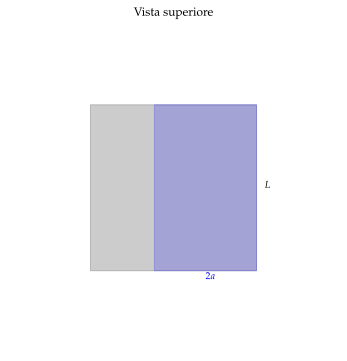

In [78]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
ax.add_patch(Rectangle((-L/2,-L/2), L, L, edgecolor='k', facecolor='k', alpha=.2))
ax.add_patch(Rectangle((L/2-2*a,-L/2), 2*a, L, edgecolor='b', facecolor='b', alpha=.2))
ax.text(L/2-a,-L/2-.2, '$2a$', usetex=True, color='b')
ax.text(L/2+.2, 0, '$L$', usetex=True)
plt.title('Vista superiore')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

Consideriamo il cubo visto di lato da una delle sue facce. Per un muone incidente con angolo di zenith $\theta$ parallelamente a questa faccia, l'angolo di azimuth sarà $\phi=k\pi/2$.

L'area efficace in funzione di $\theta$ è data da 
$$ A_{\rm eff}(\theta,\phi=k\pi/2) = 2aL\,\cos\theta$$
ovvero la proiezione dell'area evidenziata nella vista superiore, proiettata nella direzione del muone incidente. Si vede facilmente nella vista laterale che per $n$ piani di trigger il valore di $a$ è dato da
$$ a = \frac{L}{2}-\frac{1}{2}(n-1)\Delta z\tan\theta $$
e quindi l'area efficace è data da
$$ A_{\rm eff}(\theta,\phi=k\pi/2) = L\left[L-(n-1)\Delta z\tan\theta\right]\cos\theta\,. $$
In particolare si vede che per $\theta=0$ (incidenza normale) risulta $A_{\rm eff}=L^2$, mentre per $n=1$ risulta $A_{\rm eff}=L^2\cos\theta$. Il valore massimo di $\theta$ per cui $a=0$ e quindi l'area efficace si annulla è dato da 
$$\theta_{\rm max}=\tan^{-1}\left(\frac{L}{(n-1)\Delta z}\right)$$

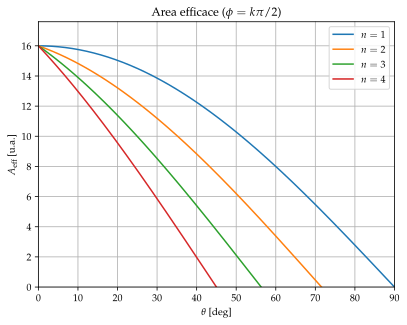

In [95]:
fig, ax = plt.subplots()
for n in range(1,5):
    if n == 1:
        th_max = np.pi/2
    else:
        th_max = np.arctan(L/((n-1)*dz))
    th_axis = np.linspace(0, th_max, 1000)
    a_eff = L*(L-(n-1)*dz*np.tan(th_axis))*np.cos(th_axis)
    plt.plot(th_axis, a_eff, label=rf'$n={n}$')
plt.title(r'Area efficace ($\phi = k\pi/2$)')
plt.grid()
plt.xticks([np.deg2rad(t) for t in range(0,91,10)], [t for t in range(0,91,10)])
plt.xlim(0, np.pi/2)
plt.ylim(0, L**2*1.1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$A_{\rm eff}$ [u.a.]')
plt.legend()

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

## Caso #2: incidenza nel piano diagonale ($\phi = (k+1)\pi/4$)

In [97]:
if n_trig == 1:
    th_max = np.pi/2
else:
    th_max = np.arctan(L*np.sqrt(2)/((n_trig-1)*dz))
    
print('Theta max (deg):', np.rad2deg(th_max))
if th > th_max:
    print("L'angolo di incidenza è superiore al valore massimo per n_trig =", n_trig, "!")

Theta max (deg): 64.7605981793211


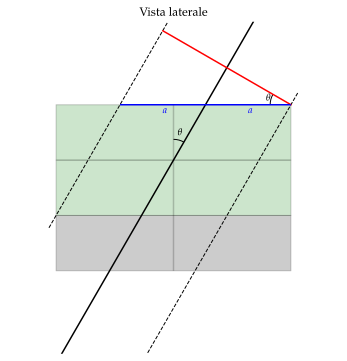

In [81]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
x = np.linspace(-3,3,1000)
a = (1/2)*(L*np.sqrt(2)-(n_trig-1)*dz*np.tan(th))
offset = L/2-(1/2)*(n_trig-1)*dz

for i in range(3):
    plane = Rectangle((-L/np.sqrt(2),-L/2+i*dz), L*np.sqrt(2), dz, edgecolor='k', facecolor='g' if i>=4-n_trig else 'k', alpha=.2)
    ax.add_patch(plane)

ax.vlines(0, ymin=-L/2, ymax=L/2, ls='-', color='k', alpha=.2)
ax.plot(x, x*np.tan(np.pi/2-th)+offset, c='k')
ax.plot(x, (x-a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x, (x+a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x[(x<L/np.sqrt(2)) & (x>L/np.sqrt(2)-2*a*np.cos(th)**2)], (x[(x<L/np.sqrt(2)) & (x>L/np.sqrt(2)-2*a*np.cos(th)**2)]-L/np.sqrt(2))*np.tan(-th)+L/2, color='r')
ax.hlines(L/2, xmin=L/np.sqrt(2)-2*a, xmax=L/np.sqrt(2), color='b')
ax.add_patch(Arc((0,offset), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi/2-th), theta2=np.rad2deg(np.pi/2)))
ax.add_patch(Arc((L/np.sqrt(2),L/2), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi-th), theta2=np.rad2deg(np.pi)))

ax.text(.1, offset+.6, r'$\theta$', usetex=True)
ax.text(L/np.sqrt(2)-a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/np.sqrt(2)-3*a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/np.sqrt(2)-.6,L/2+.1, r'$\theta$', usetex=True)
plt.title('Vista laterale')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

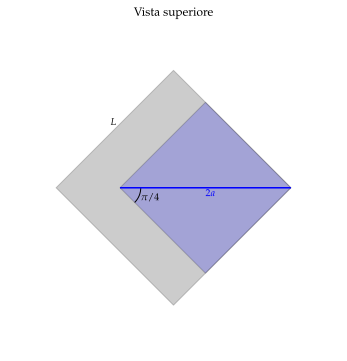

In [82]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)

ax.add_patch(Rectangle((0,-L/np.sqrt(2)), L, L, edgecolor='k', facecolor='k', alpha=.2, angle=45))
ax.add_patch(Rectangle((L/np.sqrt(2)-a,-a), a*np.sqrt(2), a*np.sqrt(2), edgecolor='k', facecolor='b', alpha=.2, angle=45))
ax.hlines(0, xmin=L/np.sqrt(2)-2*a, xmax=L/np.sqrt(2), color='b')
ax.add_patch(Arc((L/np.sqrt(2)-2*a,0), width=1., height=1., angle=-45, theta1=0, theta2=45))

ax.text(L/np.sqrt(2)-a,-.2, '$2a$', usetex=True, color='b')
ax.text(L/np.sqrt(2)-2*a+.5,-.3, '$\pi/4$')
ax.text(-L/(2*np.sqrt(2))-.1, L/(2*np.sqrt(2))+.1, '$L$', usetex=True)
plt.title('Vista superiore')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

Consideriamo ora il cubo visto lateralmente rispetto a uno dei suoi spigoli: l'angolo di azimuth del muone sarà in questo caso $\phi = (k+1)\pi/4$.
L'area efficace sarà in questo caso data da
$$ A_{\rm eff}(\theta,\phi=(k+1)\pi/4) = 2a^2\,\cos\theta\,,$$
ovvero l'area di un quadrato di diagonale $2a$ (evidenziata nella vista superiore) proiettata nella direzione del muone incidente. 

Con una costruzione geometrica analoga alla precedente si mostra che in questo caso $a$ è dato da
$$ a = \frac{L\sqrt{2}}{2}-\frac{1}{2}(n-1)\Delta z\tan\theta$$
e quindi l'area efficace risulta
$$ A_{\rm eff}(\theta,\phi=(k+1)\pi/4) = \left(L^2+(n-1)^2\frac{\Delta z^2}{2}\tan^2\theta-(n-1)\sqrt{2}L\Delta z\tan\theta\right)\cos\theta\,. $$
Anche in questo caso per $\theta=0$ risulta $A_{\rm eff}=L^2$ e per $n=1$ risulta $A_{\rm eff}=L^2\cos\theta$, mentre risulta $A_{\rm eff}=0$ per
$$\theta_{\rm max}=\tan^{-1}\left(\frac{L\sqrt{2}}{(n-1)\Delta z}\right)$$ .

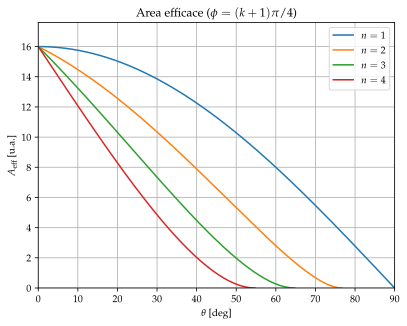

In [101]:
fig, ax = plt.subplots()
for n in range(1,5):
    if n == 1:
        th_max = np.pi/2
    else:
        th_max = np.arctan(L*np.sqrt(2)/((n-1)*dz))
    th_axis = np.linspace(0, th_max, 1000)
    a_eff = L**2 + (n-1)**2*(dz**2/2)*np.tan(th_axis)**2-(n-1)*np.sqrt(2)*L*dz*np.tan(th_axis)
    a_eff *= np.cos(th_axis)
    plt.plot(th_axis, a_eff, label=rf'$n={n}$')
plt.title(r'Area efficace ($\phi = (k+1)\pi/4$)')
plt.grid()
plt.xticks([np.deg2rad(t) for t in range(0,91,10)], [t for t in range(0,91,10)])
plt.xlim(0, np.pi/2)
plt.ylim(0, L**2*1.1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$A_{\rm eff}$ [u.a.]')
plt.legend()

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

## Caso #3: incidenza con $\phi$ generico

In [84]:
phi_deg = 15
phi = np.deg2rad(phi_deg)
if phi_deg > 45 or phi_deg < 0:
    print("Inserire un valore di phi compreso fra 0 e 45 gradi!")

In [103]:
if n_trig == 1:
    th_max = np.pi/2
else:
    th_max = np.arctan(L/((n_trig-1)*dz*np.cos(phi)))
    
print('Theta max (deg):', np.rad2deg(th_max))
if th > th_max:
    print("L'angolo di incidenza è superiore al valore massimo per n_trig =", n_trig, "!")

Theta max (deg): 57.22046746214508


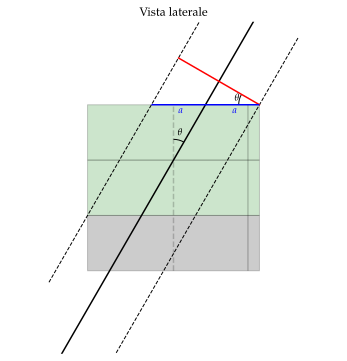

In [85]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
x = np.linspace(-3,3,1000)
a = (1/2)*(L/np.cos(phi)-(n_trig-1)*dz*np.tan(th))
offset = L/2-(1/2)*(n_trig-1)*dz

for i in range(3):
    plane = Rectangle((-L/(2*np.cos(phi)),-L/2+i*dz), L/np.cos(phi), dz, edgecolor='k', facecolor='g' if i>=4-n_trig else 'k', alpha=.2)
    ax.add_patch(plane)

ax.vlines(-L/(2*np.cos(phi))+L*np.cos(phi), ymin=-L/2, ymax=L/2, ls='-', color='k', alpha=.2)
ax.vlines(0, ymin=-L/2, ymax=L/2, ls='--', color='k', alpha=.2)
ax.plot(x, x*np.tan(np.pi/2-th)+offset, c='k')
ax.plot(x, (x-a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x, (x+a)*np.tan(np.pi/2-th)+offset, c='k', lw=1, ls='--')
ax.plot(x[(x<L/(2*np.cos(phi))) & (x>L/(2*np.cos(phi))-2*a*np.cos(th)**2)], (x[(x<L/(2*np.cos(phi))) & (x>L/(2*np.cos(phi))-2*a*np.cos(th)**2)]-L/(2*np.cos(phi)))*np.tan(-th)+L/2, color='r')
ax.hlines(L/2, xmin=L/(2*np.cos(phi))-2*a, xmax=L/(2*np.cos(phi)), color='b')
ax.add_patch(Arc((0,offset), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi/2-th), theta2=np.rad2deg(np.pi/2)))
ax.add_patch(Arc((L/(2*np.cos(phi)),L/2), width=1., height=1., angle=0, theta1=np.rad2deg(np.pi-th), theta2=np.rad2deg(np.pi)))

ax.text(.1, offset+.6, r'$\theta$', usetex=True)
ax.text(L/(2*np.cos(phi))-a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/(2*np.cos(phi))-3*a/2,L/2-.2, '$a$', usetex=True, color='b')
ax.text(L/(2*np.cos(phi))-.6,L/2+.1, r'$\theta$', usetex=True)
plt.title('Vista laterale')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

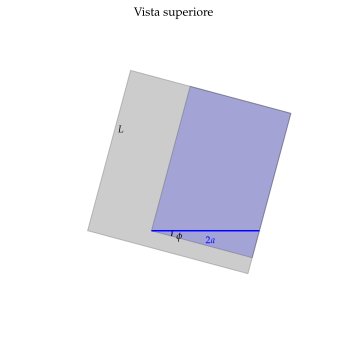

In [86]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
ax.set_xlim(-L,L)
ax.set_ylim(-L,L)
offset = (L/np.cos(phi)-2*L*np.sin(phi))/2

ax.add_patch(Rectangle((-L/(2*np.cos(phi)),-offset), L, L, edgecolor='k', facecolor='k', alpha=.2, angle=-phi_deg))
ax.add_patch(Rectangle((L/np.cos(phi)-L*np.sin(phi)-offset-2*a,-offset), 2*a*np.cos(phi), L-L*np.tan(phi)+2*a*np.sin(phi), edgecolor='k', facecolor='b', alpha=.2, angle=-phi_deg))
ax.hlines(-offset, xmin=L/np.cos(phi)-L*np.sin(phi)-offset-2*a, xmax=L/np.cos(phi)-L*np.sin(phi)-offset, color='b')
ax.add_patch(Arc((L/np.cos(phi)-L*np.sin(phi)-offset-2*a,-offset), width=1., height=1., angle=-phi_deg, theta1=0, theta2=phi_deg))

ax.text(L/np.cos(phi)-L*np.sin(phi)-offset-2*a+.6,-offset-.2, '$\phi$')
ax.text(L/np.cos(phi)-L*np.sin(phi)-offset-a,-offset-.3, '$2a$', usetex=True, color='b')
ax.text(-L/(4*np.cos(phi))-.3, L/(4*np.cos(phi))+.3, '$L$', usetex=True)
plt.title('Vista superiore')
plt.axis('off')

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')

Il caso generale si ottiene dal precedente con la sostituzione $L\sqrt{2}\to L/\cos\phi$ (prolungamento del segmento blu nella vista superiore). L'area efficace è quella del rettangolo evidenziato proiettata nella direzione del muone incidente, ovvero
$$ A_{\rm eff}(\theta,\phi) = bb'\,\cos\theta\,,$$
dove i lati del rettangolo sono dati da
$$ b = 2a\cos\phi\,, $$
$$ b' = L-\left(\frac{L}{\cos\phi}-2a\right)\sin\phi = L - L\tan\phi +2a\sin\phi\,. $$
Il segmento $a$ si ottiene in modo analogo ai casi precedenti
$$ a = \frac{L}{2\cos\phi}-\frac{1}{2}(n-1)\Delta z\tan\theta $$
e quindi
$$ A_{\rm eff}(\theta,\phi) = (L - L\tan\phi + 2a\sin\phi)\,2a\cos\phi\,\cos\theta $$
$$ \Rightarrow A_{\rm eff}(\theta,\phi) = 2La\cos\phi\cos\theta(1-\tan\phi) + 4a^2\sin\phi\cos\phi\cos\theta$$
$$ \Rightarrow A_{\rm eff}(\theta,\phi) = \left[\left(\frac{L^2}{\cos\phi}-(n-1)L\Delta z\tan\theta\right)(1-\tan\phi) + \left(\frac{L^2}{\cos^2\phi}+(n-1)^2\Delta z^2\tan^2\theta-2\frac{(n-1)}{\cos\phi}L\Delta z\tan\theta\right)\sin\phi\right]\cos\phi\cos\theta $$
Dall'ultima espressione troviamo facilmente che per $\phi=0$ ci riduciamo al caso #1 e per $\phi=\pi/4$ ci riduciamo al caso #2! Inoltre per $\theta=0$ risulta correttamente $A_{\rm eff}=L^2$ e per $n=1$ risulta $A_{\rm eff}=L^2\cos\theta$, mentre il valore massimo di $\theta$ è quello che annulla $a$, ovvero 
$$\theta_{\rm max}=\tan^{-1}\left(\frac{L}{(n-1)\Delta z\cos\theta}\right)$$ .

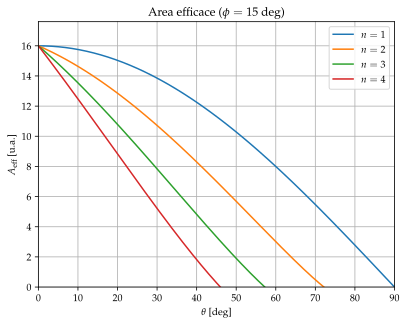

In [104]:
fig, ax = plt.subplots()
for n in range(1,5):
    if n == 1:
        th_max = np.pi/2
    else:
        th_max = np.arctan(L/((n-1)*dz*np.cos(phi)))
    th_axis = np.linspace(0, th_max, 1000)
    term_1 = (L**2/np.cos(phi) - (n-1)*L*dz*np.tan(th_axis))*(1-np.tan(phi))
    term_2 = (L**2/np.cos(phi)**2 + (n-1)**2*dz**2*np.tan(th_axis)**2 - 2*(n-1)/np.cos(phi)*L*dz*np.tan(th_axis))*np.sin(phi)
    a_eff = (term_1 + term_2)*np.cos(phi)*np.cos(th_axis)
    plt.plot(th_axis, a_eff, label=rf'$n={n}$')
plt.title(rf'Area efficace ($\phi = {phi_deg}$ deg)')
plt.grid()
plt.xticks([np.deg2rad(t) for t in range(0,91,10)], [t for t in range(0,91,10)])
plt.xlim(0, np.pi/2)
plt.ylim(0, L**2*1.1)
plt.xlabel(r'$\theta$ [deg]')
plt.ylabel(r'$A_{\rm eff}$ [u.a.]')
plt.legend()

plt.savefig('fig.svg', bbox_inches='tight', dpi=300)
plt.close()
SVG('fig.svg')